In [1]:
Tasmia = "In the name of Allah, the Most Benoficient, the Most Merciful"
print(Tasmia)

In the name of Allah, the Most Benoficient, the Most Merciful


### Import Libraries

In [2]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import datetime as dt
import seaborn as sns
import matplotlib.pyplot as plt

### Import Dataset

In [3]:
# Import Dataset

police = pd.read_csv("police.csv")
police[:5]

,state,stop_date,stop_time,county_name,driver_gender,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop,district
0,RI,2005-01-04,12:55,NaN,M,White,Equipment/Inspection Violation,Equipment,False,NaN,Citation,False,0-15 Min,False,Zone X4
1,RI,2005-01-23,23:15,NaN,M,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone K3
2,RI,2005-02-17,04:15,NaN,M,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone X4
3,RI,2005-02-20,17:15,NaN,M,White,Call for Service,Other,False,NaN,Arrest Driver,True,16-30 Min,False,Zone X1
4,RI,2005-02-24,01:20,NaN,F,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone X3


In [4]:
# Data Information

police.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91741 entries, 0 to 91740
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   state               91741 non-null  object 
 1   stop_date           91741 non-null  object 
 2   stop_time           91741 non-null  object 
 3   county_name         0 non-null      float64
 4   driver_gender       86536 non-null  object 
 5   driver_race         86539 non-null  object 
 6   violation_raw       86539 non-null  object 
 7   violation           86539 non-null  object 
 8   search_conducted    91741 non-null  bool   
 9   search_type         3307 non-null   object 
 10  stop_outcome        86539 non-null  object 
 11  is_arrested         86539 non-null  object 
 12  stop_duration       86539 non-null  object 
 13  drugs_related_stop  91741 non-null  bool   
 14  district            91741 non-null  object 
dtypes: bool(2), float64(1), object(12)
memory usage: 9.3+

In [5]:
# Drop unnecessary columns

police =  police.drop(columns = ["state", "county_name", "search_type", "violation_raw"])
police.isnull().sum()

stop_date                0
stop_time                0
driver_gender         5205
driver_race           5202
violation             5202
search_conducted         0
stop_outcome          5202
is_arrested           5202
stop_duration         5202
drugs_related_stop       0
district                 0
dtype: int64

In [6]:
# Drop Missing values rows

police = police.dropna()
police[:3]

,stop_date,stop_time,driver_gender,driver_race,violation,search_conducted,stop_outcome,is_arrested,stop_duration,drugs_related_stop,district
0,2005-01-04,12:55,M,White,Equipment,False,Citation,False,0-15 Min,False,Zone X4
1,2005-01-23,23:15,M,White,Speeding,False,Citation,False,0-15 Min,False,Zone K3
2,2005-02-17,04:15,M,White,Speeding,False,Citation,False,0-15 Min,False,Zone X4


In [7]:
# Check cleaned data

police.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 86536 entries, 0 to 91740
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   stop_date           86536 non-null  object
 1   stop_time           86536 non-null  object
 2   driver_gender       86536 non-null  object
 3   driver_race         86536 non-null  object
 4   violation           86536 non-null  object
 5   search_conducted    86536 non-null  bool  
 6   stop_outcome        86536 non-null  object
 7   is_arrested         86536 non-null  object
 8   stop_duration       86536 non-null  object
 9   drugs_related_stop  86536 non-null  bool  
 10  district            86536 non-null  object
dtypes: bool(2), object(9)
memory usage: 6.8+ MB


**Combine date & time columns**

In [8]:
combined = police["stop_date"].str.cat(police["stop_time"], sep = " ")
police["stop_datetime"] = pd.to_datetime(combined)
police[:3]

,stop_date,stop_time,driver_gender,driver_race,violation,search_conducted,stop_outcome,is_arrested,stop_duration,drugs_related_stop,district,stop_datetime
0,2005-01-04,12:55,M,White,Equipment,False,Citation,False,0-15 Min,False,Zone X4,2005-01-04 12:55:00
1,2005-01-23,23:15,M,White,Speeding,False,Citation,False,0-15 Min,False,Zone K3,2005-01-23 23:15:00
2,2005-02-17,04:15,M,White,Speeding,False,Citation,False,0-15 Min,False,Zone X4,2005-02-17 04:15:00


In [9]:
police = police.drop(columns = ["stop_date", "stop_time"])
police[:3]

,driver_gender,driver_race,violation,search_conducted,stop_outcome,is_arrested,stop_duration,drugs_related_stop,district,stop_datetime
0,M,White,Equipment,False,Citation,False,0-15 Min,False,Zone X4,2005-01-04 12:55:00
1,M,White,Speeding,False,Citation,False,0-15 Min,False,Zone K3,2005-01-23 23:15:00
2,M,White,Speeding,False,Citation,False,0-15 Min,False,Zone X4,2005-02-17 04:15:00


In [10]:
police.set_index("stop_datetime", inplace = True)

**Change data types**

In [11]:
police["driver_gender"] = police["driver_gender"].astype("str")

police["driver_race"] = police["driver_race"].astype("str")

police["violation"] = police["violation"].astype("str")

police["stop_outcome"] = police["stop_outcome"].astype("str")

police["is_arrested"] = police["is_arrested"].astype("bool")

police["district"] = police["district"].astype("str")

**Violation Types**

In [12]:
vio = police["violation"].value_counts().to_frame().reset_index()
vio["Percentage"] = ((vio["violation"] / vio["violation"].sum()) * 100).round(2)
vio.columns = ["Violations", "Counts", "Percentage"]
vio

,Violations,Counts,Percentage
0,Speeding,48423,55.96
1,Moving violation,16224,18.75
2,Equipment,10921,12.62
3,Other,4409,5.09
4,Registration/plates,3703,4.28
5,Seat belt,2856,3.30


**Outcome Types**

In [13]:
out = police["stop_outcome"].value_counts().to_frame().reset_index()
out["Percentage"] = ((out["stop_outcome"] / out["stop_outcome"].sum()) * 100).round(2)
out.columns = ["Action", "Count", "Percentage"]
out

,Action,Count,Percentage
0,Citation,77091,89.09
1,Warning,5136,5.94
2,Arrest Driver,2735,3.16
3,No Action,624,0.72
4,N/D,607,0.70
5,Arrest Passenger,343,0.40


**Drivers Race**

In [14]:
race = police["driver_race"].value_counts().to_frame().reset_index()
race["Percentage"] = ((race["driver_race"] / race["driver_race"].sum()) * 100).round(2)
race.columns = ["Race", "Count", "Percentage"]
race

,Race,Count,Percentage
0,White,61870,71.50
1,Black,12285,14.20
2,Hispanic,9727,11.24
3,Asian,2389,2.76
4,Other,265,0.31


**Actions based on violations**

In [15]:
# Grouping of violations and outcome by counts
abv = police.groupby(["violation", "stop_outcome"])["stop_outcome"].agg("count").to_frame()

# Rename column
abv.columns = ["Count"]

# Reset Index
abv = abv.reset_index()

# Pivot Table
pivot = abv.pivot(index = "violation", columns = "stop_outcome", values = "Count")

# Remove index & column names
pivot.index.name = None
pivot.columns.name = None

# Display Table
pivot

,Arrest Driver,Arrest Passenger,Citation,N/D,No Action,Warning
Equipment,553,156,8220,455,54,1483
Moving violation,850,90,13923,40,73,1248
Other,341,10,3536,43,429,50
Registration/plates,316,24,3138,19,20,186
Seat belt,64,11,2415,3,7,356
Speeding,611,52,45859,47,41,1813


**Violations by Race**

In [16]:
# Grouping of vilations by race
vr = police.groupby(["violation", "driver_race"])["driver_race"].agg(["count"]).reset_index()

# Pivot Table
vr = vr.pivot(columns = "violation", index = "driver_race", values = "count")

# Remove bames
vr.index.name = None
vr.columns.name = None
vr

,Equipment,Moving violation,Other,Registration/plates,Seat belt,Speeding
Asian,219,318,111,69,52,1620
Black,2153,2940,817,869,456,5050
Hispanic,2168,2381,625,776,516,3261
Other,14,58,13,9,4,167
White,6367,10527,2843,1980,1828,38325


**Stop Outcome by Race**

In [17]:
sor = police.groupby(["stop_outcome", "driver_race"])["driver_race"].agg(["count"]).reset_index()
sor = sor.pivot(columns = "stop_outcome", index = "driver_race", values = "count")

# Remove bames
sor.index.name = None
sor.columns.name = None
sor

,Arrest Driver,Arrest Passenger,Citation,N/D,No Action,Warning
Asian,42.0,4.0,2205.0,10.0,20.0,108.0
Black,667.0,102.0,10531.0,105.0,80.0,800.0
Hispanic,538.0,67.0,8288.0,92.0,86.0,656.0
Other,2.0,NaN,244.0,2.0,3.0,14.0
White,1486.0,170.0,55823.0,398.0,435.0,3558.0


**Gender Frequency**

In [18]:
police["driver_gender"].value_counts(normalize = True).to_frame()

,driver_gender
M,0.72527
F,0.27473


**Volations by Gender**

In [19]:
vsg = police.groupby(["violation", "driver_gender"])["driver_gender"].agg(["count"]).reset_index()
vsg = vsg.pivot(columns = "driver_gender", index = "violation", values = "count")
vsg["F %"] = ((vsg["F"] / (vsg["F"] + vsg["M"])) * 100).round(2)
vsg["M %"] = ((vsg["M"] / (vsg["F"] + vsg["M"])) * 100).round(2)
vsg.index.name = None
vsg.columns.name = None
vsg

,F,M,F %,M %
Equipment,2501,8420,22.90,77.10
Moving violation,3286,12938,20.25,79.75
Other,707,3702,16.04,83.96
Registration/plates,1056,2647,28.52,71.48
Seat belt,578,2278,20.24,79.76
Speeding,15646,32777,32.31,67.69


**Stop Outcome by Gender**

In [20]:
sog = police.groupby(["stop_outcome", "driver_gender"])["driver_gender"].agg(["count"]).reset_index()
sog = sog.pivot(index = "stop_outcome", columns = "driver_gender", values = "count")
sog["F %"] = ((sog["F"] / (sog["F"] + sog["M"])) * 100).round(2)
sog["M %"] = ((sog["M"] / (sog["F"] + sog["M"])) * 100).round(2)
sog.index.name = None
sog.columns.name = None
sog

,F,M,F %,M %
Arrest Driver,556,2179,20.33,79.67
Arrest Passenger,113,230,32.94,67.06
Citation,21251,55840,27.57,72.43
N/D,168,439,27.68,72.32
No Action,201,423,32.21,67.79
Warning,1485,3651,28.91,71.09


**Comparing speeding outcomes by gender**

In [21]:
fs = police[(police["driver_gender"] == "F") & (police["violation"] == "Speeding")]
fs["stop_outcome"].value_counts(normalize = True).to_frame().reset_index()

,index,stop_outcome
0,Citation,0.952192
1,Warning,0.040074
2,Arrest Driver,0.005752
3,N/D,0.000959
4,Arrest Passenger,0.000639
5,No Action,0.000383


In [22]:
ms = police[(police["driver_gender"] == "M") & (police["violation"] == "Speeding")]
ms["stop_outcome"].value_counts(normalize = True).to_frame().reset_index()

,index,stop_outcome
0,Citation,0.944595
1,Warning,0.036184
2,Arrest Driver,0.015895
3,Arrest Passenger,0.001281
4,No Action,0.001068
5,N/D,0.000976


In [23]:
vs = police[police["violation"] == "Speeding"]
vs = vs.groupby(["driver_gender", "stop_outcome"])["stop_outcome"].agg(["count"])
percents_df = vs.groupby(level=0).apply(lambda x: 100 * x / float(x.sum()))
percents_df = percents_df.reset_index()
percents_df = percents_df.pivot(index = "stop_outcome", columns = "driver_gender", values = "count")
percents_df.index.name = None
percents_df.columns.name = None
percents_df

,F,M
Arrest Driver,0.575227,1.589529
Arrest Passenger,0.063914,0.128139
Citation,95.219225,94.459530
N/D,0.095871,0.097629
No Action,0.038348,0.106782
Warning,4.007414,3.618391


**Percentage of Search Conducted on Violations by Gender**

In [24]:
svg = (police.groupby(["violation", "driver_gender"])["search_conducted"].agg(["mean"]) * 100).round(3)
svg = svg.reset_index()
svg = svg.pivot(index = "violation", columns = "driver_gender", values = "mean")

svg.index.name = None
svg.columns.name = None
svg

,F,M
Equipment,3.998,7.150
Moving violation,3.926,6.152
Other,4.102,4.619
Registration/plates,5.492,10.880
Seat belt,1.730,3.512
Speeding,0.831,2.789


**Calculating the hourly arrest rate**

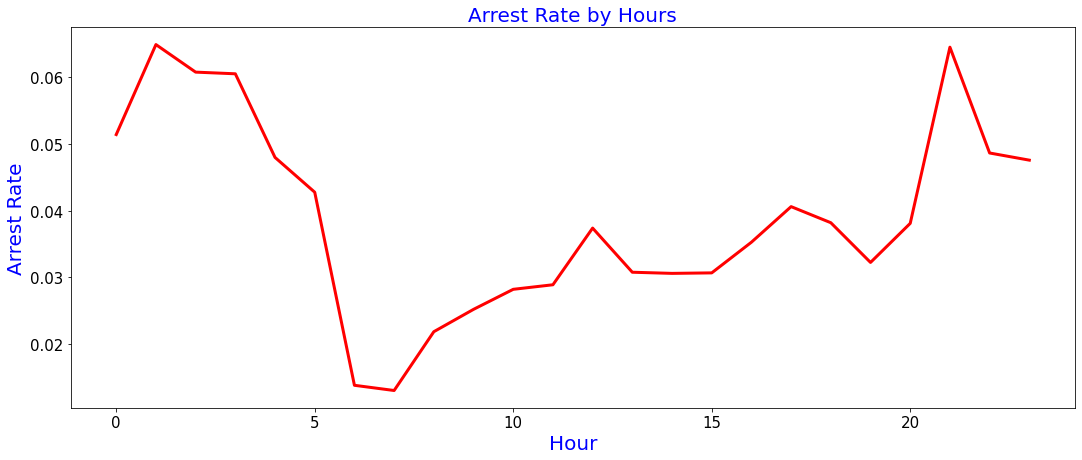

In [25]:
har = police.groupby(police.index.hour)["is_arrested"].agg(["mean"])

plt.figure(figsize = (18, 7))
sns.lineplot(x = har.index, y = "mean", data = har, color = "red", linewidth = 3)
plt.title("Arrest Rate by Hours", size = 20, color = "blue")
plt.xlabel("Hour", size = 20, color = "blue")
plt.ylabel("Arrest Rate", size = 20, color = "blue")
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.show()

**Average Drugs Related Stops by Year**

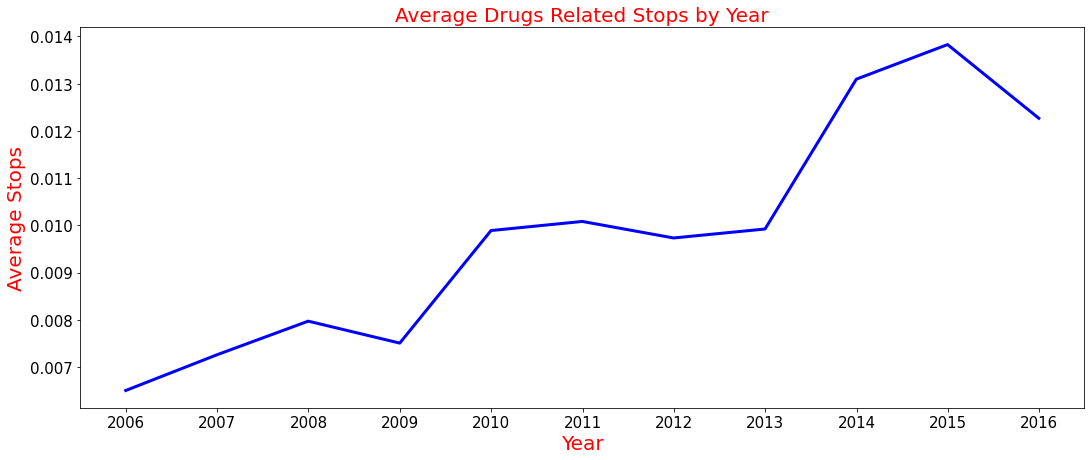

In [26]:
dy = police["drugs_related_stop"].resample("Y").mean().to_frame()
plt.figure(figsize = (18, 7))
sns.lineplot(x = dy.index, y = "drugs_related_stop", data = dy, color = "blue", linewidth = 3)
plt.title("Average Drugs Related Stops by Year", size = 20, color = "red")
plt.xlabel("Year", size = 20, color = "red")
plt.ylabel("Average Stops", size = 20, color = "red")
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.show()
plt.show()

**Average Search Conducted by Year**

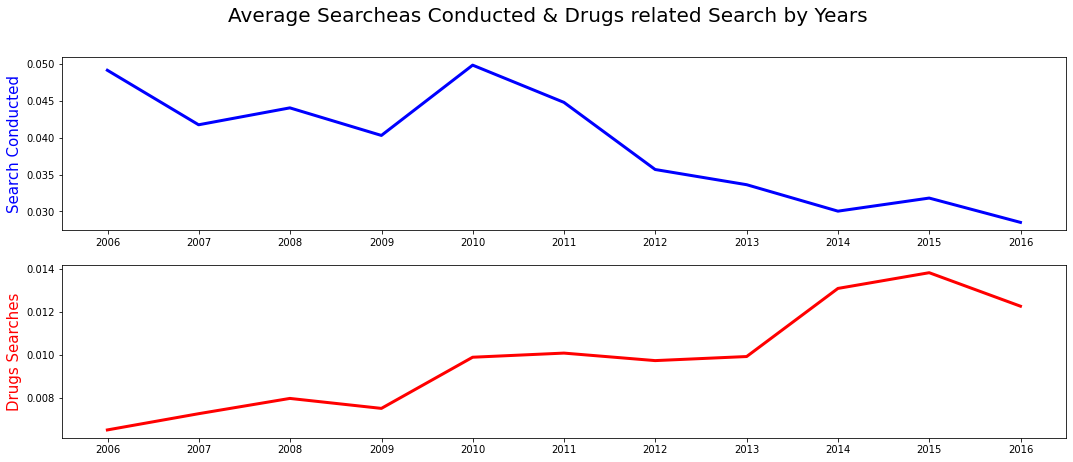

In [27]:
sy = police["search_conducted"].resample("Y").mean()
dy = police["drugs_related_stop"].resample("Y").mean()
sdy = pd.concat([sy, dy], axis = 1)

fig, axes = plt.subplots(2, 1, figsize = (18, 7))
fig.suptitle("Average Searcheas Conducted & Drugs related Search by Years", fontsize = 20)
 

sns.lineplot(ax = axes[0], x = sdy.index,  y = "search_conducted", data = sdy, linewidth = 3, color = "blue")
axes[0].set_ylabel("Search Conducted", color = "blue", size = 15)
axes[0].set_xlabel(None)

plt.rc('xtick', labelsize=15) 
plt.rc('ytick', labelsize=15)


sns.lineplot(ax = axes[1], x = sdy.index, y = "drugs_related_stop", data = sdy, linewidth = 3, color = "red")
axes[1].set_ylabel("Drugs Searches", color = "red", size = 15)
axes[1].set_xlabel(None)

plt.show()

**Tallying violations by district**

In [28]:
police[:3]

,driver_gender,driver_race,violation,search_conducted,stop_outcome,is_arrested,stop_duration,drugs_related_stop,district
stop_datetime,,,,,,,,,
2005-01-04 12:55:00,M,White,Equipment,False,Citation,False,0-15 Min,False,Zone X4
2005-01-23 23:15:00,M,White,Speeding,False,Citation,False,0-15 Min,False,Zone K3
2005-02-17 04:15:00,M,White,Speeding,False,Citation,False,0-15 Min,False,Zone X4


In [29]:
vd = pd.crosstab(police["district"], police["violation"])
vd

violation,Equipment,Moving violation,Other,Registration/plates,Seat belt,Speeding
district,,,,,,
Zone K1,672,1254,290,120,0,5960
Zone K2,2061,2962,942,768,481,10448
Zone K3,2302,2898,705,695,638,12322
Zone X1,296,671,143,38,74,1119
Zone X3,2049,3086,769,671,820,8779
Zone X4,3541,5353,1560,1411,843,9795


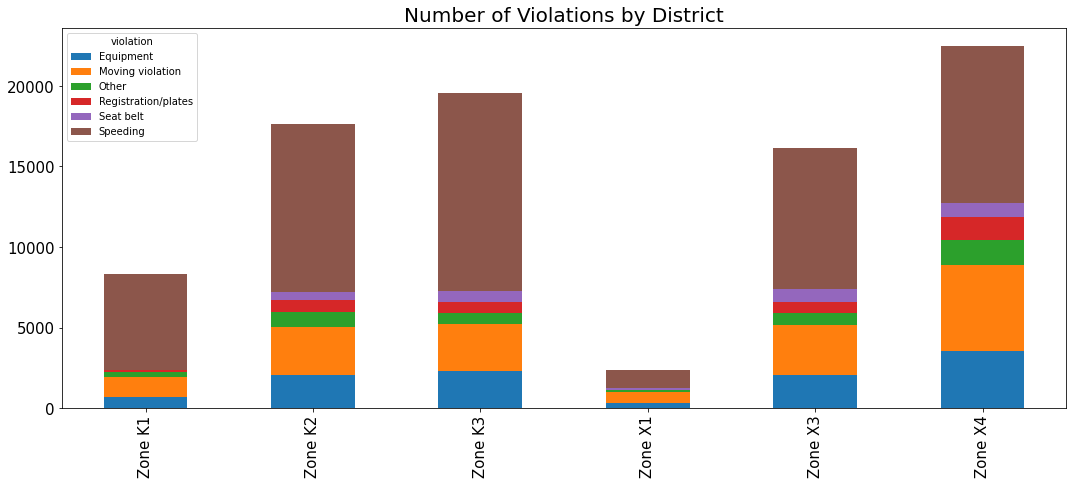

In [38]:
vd.plot(kind = "bar", stacked = True, figsize = (18, 7))
plt.title("Number of Violations by District", size = 20)
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.xlabel(None)
plt.show()

**Converting stop durations to numbers**

In [31]:
police[:3]

,driver_gender,driver_race,violation,search_conducted,stop_outcome,is_arrested,stop_duration,drugs_related_stop,district
stop_datetime,,,,,,,,,
2005-01-04 12:55:00,M,White,Equipment,False,Citation,False,0-15 Min,False,Zone X4
2005-01-23 23:15:00,M,White,Speeding,False,Citation,False,0-15 Min,False,Zone K3
2005-02-17 04:15:00,M,White,Speeding,False,Citation,False,0-15 Min,False,Zone X4


In [32]:
mapping = {"0-15 Min": 8,
           "16-30 Min": 23,
           "30+ Min": 45}

police["stop_minutes"] = police["stop_duration"].map(mapping)
police[:3]

,driver_gender,driver_race,violation,search_conducted,stop_outcome,is_arrested,stop_duration,drugs_related_stop,district,stop_minutes
stop_datetime,,,,,,,,,,
2005-01-04 12:55:00,M,White,Equipment,False,Citation,False,0-15 Min,False,Zone X4,8
2005-01-23 23:15:00,M,White,Speeding,False,Citation,False,0-15 Min,False,Zone K3,8
2005-02-17 04:15:00,M,White,Speeding,False,Citation,False,0-15 Min,False,Zone X4,8


In [33]:
police["stop_minutes"].unique()

array([ 8, 23, 45], dtype=int64)

**Average Minutes Stop by Violation**

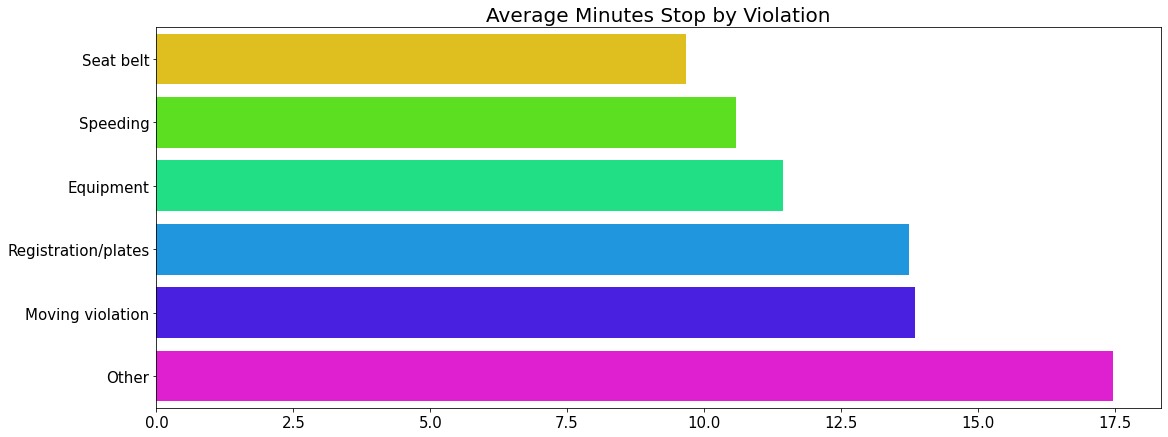

In [43]:
sv = police.groupby("violation")["stop_minutes"].agg("mean").to_frame().reset_index().sort_values(by = "stop_minutes")

plt.figure(figsize = (18, 7))
sns.barplot(x = "stop_minutes", y = "violation", data = sv, palette = "hsv")
plt.title("Average Minutes Stop by Violation", size = 20)
plt.ylabel(None)
plt.xlabel(None)
plt.show()

### Analyzing the Effect of Weather on Policing

In [49]:
weather = pd.read_csv("weather.csv")
weather[:5]

,STATION,DATE,TAVG,TMIN,TMAX,AWND,WSF2,WT01,WT02,WT03,...,WT11,WT13,WT14,WT15,WT16,WT17,WT18,WT19,WT21,WT22
0,USW00014765,2005-01-01,44.0,35,53,8.95,25.1,1.0,NaN,NaN,...,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,USW00014765,2005-01-02,36.0,28,44,9.40,14.1,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1.0,NaN,1.0,NaN,NaN,NaN
2,USW00014765,2005-01-03,49.0,44,53,6.93,17.0,1.0,NaN,NaN,...,NaN,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
3,USW00014765,2005-01-04,42.0,39,45,6.93,16.1,1.0,NaN,NaN,...,NaN,1.0,1.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN
4,USW00014765,2005-01-05,36.0,28,43,7.83,17.0,1.0,NaN,NaN,...,NaN,1.0,NaN,NaN,1.0,NaN,1.0,NaN,NaN,NaN


In [45]:
weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4017 entries, 0 to 4016
Data columns (total 27 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   STATION  4017 non-null   object 
 1   DATE     4017 non-null   object 
 2   TAVG     1217 non-null   float64
 3   TMIN     4017 non-null   int64  
 4   TMAX     4017 non-null   int64  
 5   AWND     4017 non-null   float64
 6   WSF2     4017 non-null   float64
 7   WT01     1767 non-null   float64
 8   WT02     221 non-null    float64
 9   WT03     224 non-null    float64
 10  WT04     117 non-null    float64
 11  WT05     360 non-null    float64
 12  WT06     25 non-null     float64
 13  WT07     79 non-null     float64
 14  WT08     404 non-null    float64
 15  WT09     69 non-null     float64
 16  WT10     2 non-null      float64
 17  WT11     1 non-null      float64
 18  WT13     1175 non-null   float64
 19  WT14     575 non-null    float64
 20  WT15     6 non-null      float64
 21  WT16     1326 

In [50]:
weather = weather[["STATION", "DATE", "TMIN", "TMAX", "AWND", "WSF2"]]
weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4017 entries, 0 to 4016
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   STATION  4017 non-null   object 
 1   DATE     4017 non-null   object 
 2   TMIN     4017 non-null   int64  
 3   TMAX     4017 non-null   int64  
 4   AWND     4017 non-null   float64
 5   WSF2     4017 non-null   float64
dtypes: float64(2), int64(2), object(2)
memory usage: 188.4+ KB


In [51]:
weather.describe()

,TMIN,TMAX,AWND,WSF2
count,4017.000000,4017.000000,4017.000000,4017.000000
mean,43.484441,61.268608,8.593707,19.274782
std,17.020298,18.199517,3.364601,5.623866
min,-5.000000,15.000000,0.220000,4.900000
25%,30.000000,47.000000,6.260000,15.000000
50%,44.000000,62.000000,8.050000,17.900000
75%,58.000000,77.000000,10.290000,21.900000
max,77.000000,102.000000,26.840000,48.100000


**Plotting the temperature difference**

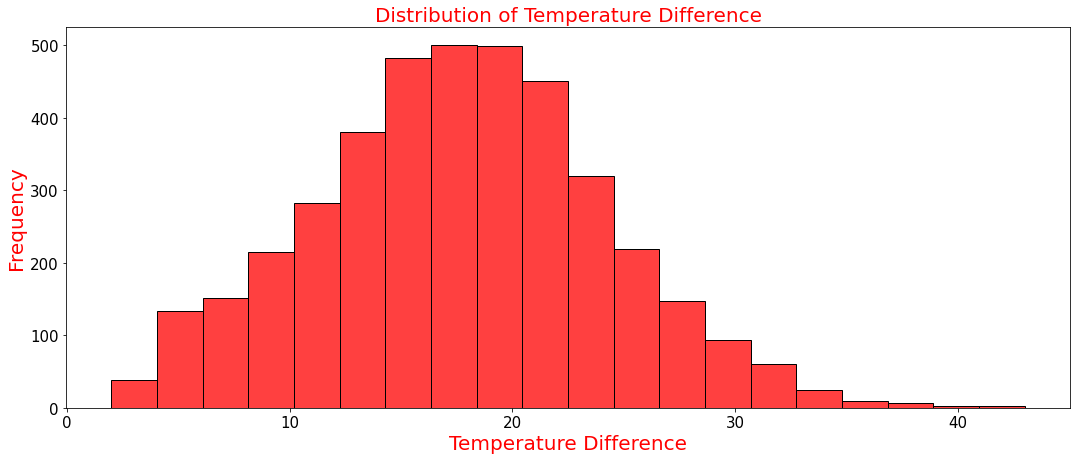

In [58]:
weather["TDIFF"] = weather["TMAX"] - weather["TMIN"]

plt.figure(figsize = (18, 7))
sns.histplot(weather["TDIFF"], bins = 20, color = "red")
plt.title("Distribution of Temperature Difference", color = "red", size = 20)
plt.ylabel("Frequency", color = "red", size = 20)
plt.xlabel("Temperature Difference", color = "red", size = 20)
plt.show()